In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

In [3]:
library(fBasics)
library(PerformanceAnalytics)
library(xts)
library(quantmod)
library(ggplot2)
library(tseries)
library(dygraphs)
library(dplyr)
library(stats)
library(MTS)
library(urca)
library(vars)
library(tsDyn)
options(warn = - 1) 

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



################################### WARNING ###################################
# We noticed you have dplyr installed. The dplyr lag() function breaks how    #
# base R's lag() function is supposed to work, which breaks lag(my_xts).      #
#                                                                             #
# Calls to lag(my_xts) that you enter or source() into this session won't     #
# work correctly.                                                             #
#                                                                             #
# All package code is unaffected because it is protected by the R namespace   #
# mechanism.                                                                  #
#                                                                             #
# Set `options(xts.warn

In [4]:
start<-format(as.Date("2019-04-22"),"%Y-%m-%d")
end<-format(as.Date("2022-12-31"),"%Y-%m-%d")

#--------- Funcion de obtención de datos, particularmente los datos de precios de cierre.
precio<-function(simbolo) {
  ##---------Obtener precios de yahoo finance:
  datos<-getSymbols(simbolo,  from=start, to= end, auto.assign = FALSE)
  ##---------eliminar datos faltantes:
  datos<-na.omit(datos)
  ##--------Mantener el precio de interis:
  datos<-datos[,4]
  assign(simbolo, datos, envir = .GlobalEnv)
}

In [5]:
precio("RYLD")  
precio("TSLA")  
precio("TM") 
precio("GM") 

in1= `RYLD`
in2=`TSLA`
in3=`TM`
in4=`GM`

In [6]:
prices<-merge.xts(`in1`, `in2`, `in3`,`in4` ,join='inner')%>% na.omit()
dim(prices)
colnames(prices)<-c("in1",  "in2", "in3", "in4")
prices
dygraph(prices, main = "in1",  "in2", "in3") %>%
 dyAxis("y", label = "Prices") %>%
  dyOptions(colors = RColorBrewer::brewer.pal(4, "Set1"))

[1] 933   4

                 in1       in2       in3       in4
2019-04-22  24.99500  17.51667 124.16000  39.50000
2019-04-23  25.15700  17.59333 124.94000  39.83000
2019-04-24  25.18900  17.24400 122.88000  39.72000
2019-04-25  25.13000  16.50867 123.19000  39.11000
2019-04-26  25.22500  15.67600 123.62000  39.68000
2019-04-29  25.25000  16.09800 123.81000  40.01000
2019-04-30  25.21100  15.91267 123.60000  38.95000
2019-05-01  25.12400  15.60067 122.92000  38.75000
2019-05-02  25.14100  16.27333 122.59000  38.25000
2019-05-03  25.30000  17.00200 123.65000  38.80000
       ...                                        
2022-12-16     18.88    150.23    140.43     36.15
2022-12-19     18.75    149.87    139.61     35.42
2022-12-20     18.84    137.80    138.83     35.20
2022-12-21     19.00    137.57    137.46     35.90
2022-12-22     18.90    125.35    137.00     33.53
2022-12-23     18.95    123.15    137.14     33.83
2022-12-27     18.92    109.10    136.16     33.32
2022-12-28     18.78    112.71 

HTML widgets cannot be represented in plain text (need html)

In [7]:
#Evaluatre Estacionariedad

adf.test(in1)
adf.test(in2)
adf.test(in3)
adf.test(in4)


	Augmented Dickey-Fuller Test

data:  in1
Dickey-Fuller = -1.9681, Lag order = 9, p-value = 0.5918
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  in2
Dickey-Fuller = -0.82177, Lag order = 9, p-value = 0.9597
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  in3
Dickey-Fuller = -1.3187, Lag order = 9, p-value = 0.8667
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  in4
Dickey-Fuller = -1.3763, Lag order = 9, p-value = 0.8423
alternative hypothesis: stationary


In [8]:
#Estacionariedad con una difrencia
adf.test(diff.xts(in1)[-1,])
adf.test(diff.xts(in2)[-1,])
adf.test(diff.xts(in3)[-1,])
adf.test(diff.xts(in4)[-1,])


	Augmented Dickey-Fuller Test

data:  diff.xts(in1)[-1, ]
Dickey-Fuller = -8.0814, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff.xts(in2)[-1, ]
Dickey-Fuller = -9.2478, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff.xts(in3)[-1, ]
Dickey-Fuller = -10.768, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff.xts(in4)[-1, ]
Dickey-Fuller = -9.895, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


In [9]:
prices_df=data.frame(date=index(prices), coredata(prices))
prices_df

date,in1,in2,in3,in4
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2019-04-22,24.995,17.51667,124.16,39.50
2019-04-23,25.157,17.59333,124.94,39.83
2019-04-24,25.189,17.24400,122.88,39.72
2019-04-25,25.130,16.50867,123.19,39.11
2019-04-26,25.225,15.67600,123.62,39.68
2019-04-29,25.250,16.09800,123.81,40.01
2019-04-30,25.211,15.91267,123.60,38.95
2019-05-01,25.124,15.60067,122.92,38.75
2019-05-02,25.141,16.27333,122.59,38.25


**Splits en training y test**

In [10]:
#Splits datos de training y test
nrow(prices_df)
h <- round(nrow(prices_df)*0.05, digits = 0 )
h
Pr_train <- prices_df[1:(nrow(prices_df) - h), ]
Pr_test<- prices_df[(nrow(prices_df) - h + 1):nrow(prices_df), ]
dim(Pr_train)
dim(Pr_test)

[1] 933

[1] 47

[1] 886   5

[1] 47  5

In [11]:
devtools::install_version("pbkrtest", version = "0.5.1")

xfun     (0.37   -> 0.39  ) [CRAN]
rlang    (1.0.6  -> 1.1.1 ) [CRAN]
cli      (3.6.0  -> 3.6.1 ) [CRAN]
vctrs    (0.5.2  -> 0.6.2 ) [CRAN]
pillar   (1.8.1  -> 1.9.0 ) [CRAN]
tibble   (3.1.8  -> 3.2.1 ) [CRAN]
dplyr    (1.1.0  -> 1.1.2 ) [CRAN]
fs       (1.6.1  -> 1.6.2 ) [CRAN]
waldo    (0.4.0  -> 0.5.1 ) [CRAN]
ps       (1.7.2  -> 1.7.5 ) [CRAN]
processx (3.8.0  -> 3.8.1 ) [CRAN]
evaluate (0.20   -> 0.21  ) [CRAN]
testthat (3.1.6  -> 3.1.8 ) [CRAN]
knitr    (1.42   -> 1.43  ) [CRAN]
broom    (1.0.3  -> 1.0.4 ) [CRAN]
lme4     (1.1-31 -> 1.1-33) [CRAN]


Installing 16 packages: xfun, rlang, cli, vctrs, pillar, tibble, dplyr, fs, waldo, ps, processx, evaluate, testthat, knitr, broom, lme4

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
install.packages("devtools")
devtools::install_github("Natsiopoulos/ARDL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




zoo         (1.8-11 -> 1.8-12) [CRAN]
vctrs       (0.5.2  -> 0.6.2 ) [CRAN]
pillar      (1.8.1  -> 1.9.0 ) [CRAN]
tibble      (3.1.8  -> 3.2.1 ) [CRAN]
fs          (1.6.1  -> 1.6.2 ) [CRAN]
testthat    (3.1.6  -> 3.1.8 ) [CRAN]
cli         (3.6.0  -> 3.6.1 ) [CRAN]
viridisLite (0.4.1  -> 0.4.2 ) [CRAN]
rlang       (1.0.6  -> 1.1.1 ) [CRAN]
quantreg    (5.94   -> 5.95  ) [CRAN]
car         (NA     -> 3.1-2 ) [CRAN]
dynlm       (NA     -> 0.3-6 ) [CRAN]
dplyr       (1.1.0  -> 1.1.2 ) [CRAN]


Skipping 1 packages not available: pbkrtest

Installing 13 packages: zoo, vctrs, pillar, tibble, fs, testthat, cli, viridisLite, rlang, quantreg, car, dynlm, dplyr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────


ERROR: Error: Failed to install 'ARDL' from GitHub:
  lazy-load database '/usr/local/lib/R/site-library/processx/R/processx.rdb' is corrupt


In [13]:
install.packages('ARDL')
library(ARDL)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

To cite the ARDL package in publications:

Use this reference to refer to the validity of the ARDL package.

  Natsiopoulos, Kleanthis, and Tzeremes, Nickolaos G. (2022). ARDL
  bounds test for cointegration: Replicating the Pesaran et al. (2001)
  results for the UK earnings equation using R. Journal of Applied
  Econometrics, 37(5), 1079-1090. https://doi.org/10.1002/jae.2919

Use this reference to cite this specific version of the ARDL package.

  Kleanthis Natsiopoulos and Nickolaos Tzeremes (2023). ARDL: ARDL, ECM
  and Bounds-Test for Cointegration. R package version 0.2.3.
  https://CRAN.R-project.org/package=ARDL



**Orden regresivo de las series**

In [14]:
library(ARDL)
models <- auto_ardl(in1 ~ in2 +in3 + in4, data = Pr_train, max_order = 6)
#A data.frame with the orders of the top 20 models
models$top_orders

in1,in2,in3,in4,AIC
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,1,1,3,-307.4131
3,1,2,3,-305.8613
3,2,1,3,-305.5587
3,1,1,4,-304.8609
4,1,1,3,-304.0697
3,2,2,3,-303.9720
4,1,1,4,-303.0164
4,1,2,3,-302.5228
4,2,1,3,-302.2174


**MODELADO**

In [15]:
mod1 <- ardl(in1 ~ in2 +in3 + in4, data = Pr_train, order = c(3,1,1,3))
summary(mod1)
     


Time series regression with "ts" data:
Start = 4, End = 886

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67649 -0.10110  0.00956  0.11214  0.73684 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1488488  0.0915044   1.627 0.104166    
L(in1, 1)    0.8668074  0.0309039  28.049  < 2e-16 ***
L(in1, 2)    0.3373509  0.0390773   8.633  < 2e-16 ***
L(in1, 3)   -0.2217837  0.0306534  -7.235 1.02e-12 ***
in2          0.0062359  0.0008919   6.992 5.41e-12 ***
L(in2, 1)   -0.0066197  0.0008909  -7.430 2.59e-13 ***
in3          0.0274560  0.0034883   7.871 1.04e-14 ***
L(in3, 1)   -0.0262163  0.0035202  -7.447 2.29e-13 ***
in4          0.0944349  0.0074301  12.710  < 2e-16 ***
L(in4, 1)   -0.0781005  0.0104085  -7.504 1.53e-13 ***
L(in4, 2)   -0.0346547  0.0103583  -3.346 0.000856 ***
L(in4, 3)    0.0214165  0.0075761   2.827 0.004809 ** 
---
Signif. codes

In [16]:

# Para la interpretación, podemos imprimir los rezagos correspondientes de cada variable que explican la respuesta. Esto no indica que sean I(d), sino el número de rezagos que logran una corrección al error.
mod1$full_formula

in1 ~ L(in1, 1) + L(in1, 2) + L(in1, 3) + in2 + L(in2, 1) + in3 + 
    L(in3, 1) + in4 + L(in4, 1) + L(in4, 2) + L(in4, 3)

**Ajustes en Training**

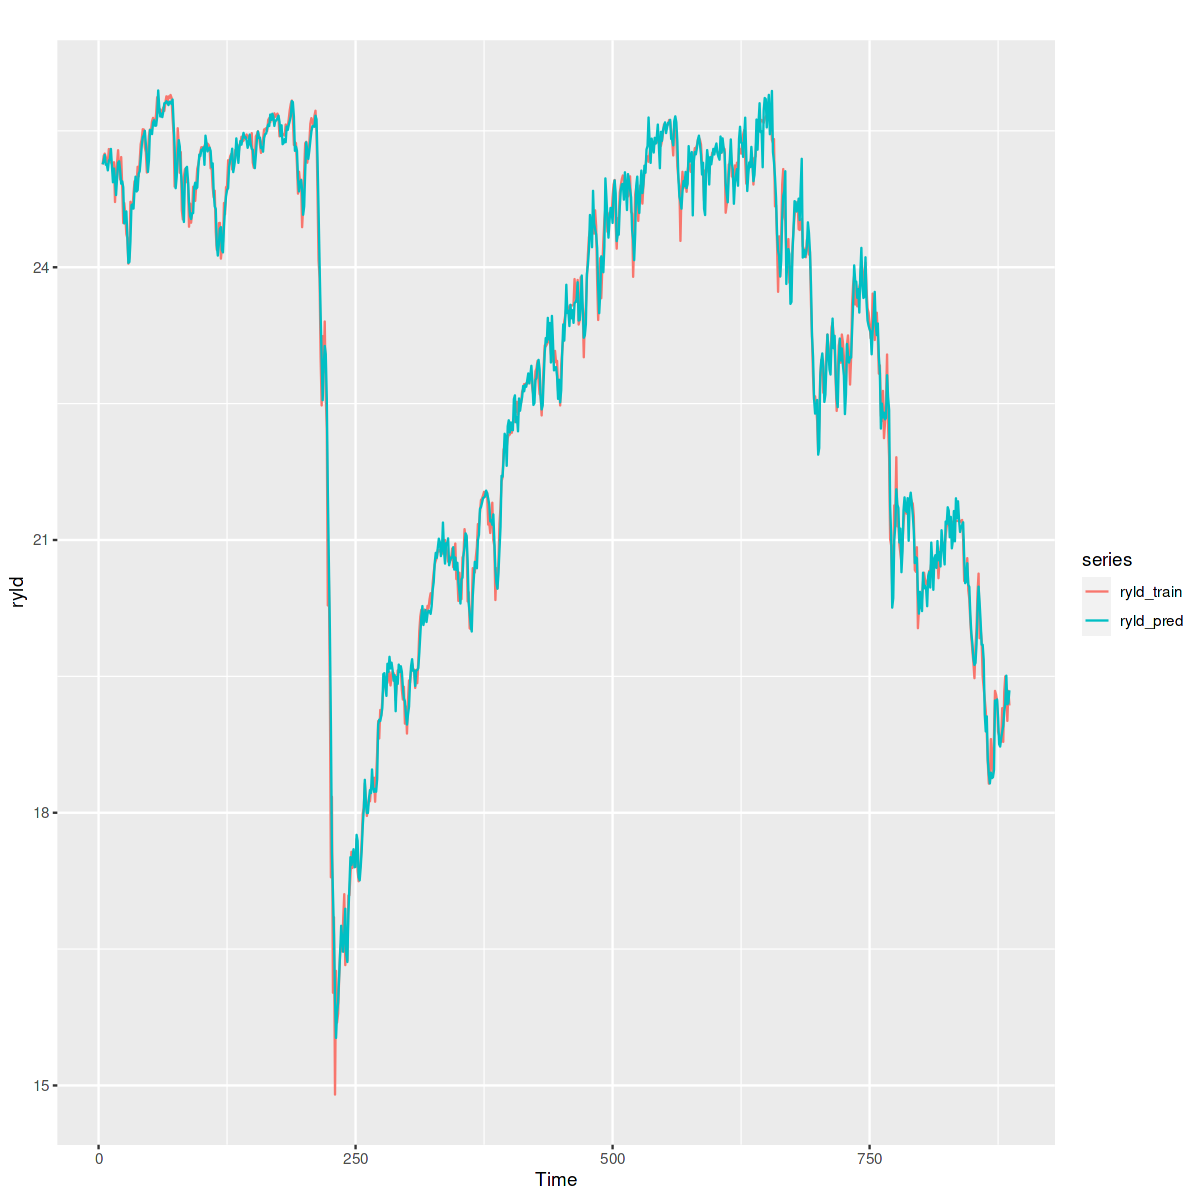

In [17]:
ryld<-cbind(Pr_train$in1[4:nrow(Pr_train)], mod1$fitted.values) 
colnames(ryld)<-c('ryld_train','ryld_pred')
options(repr.plot.width = 10, repr.plot.height =10)
autoplot(ryld)

**Predicción sobre test**

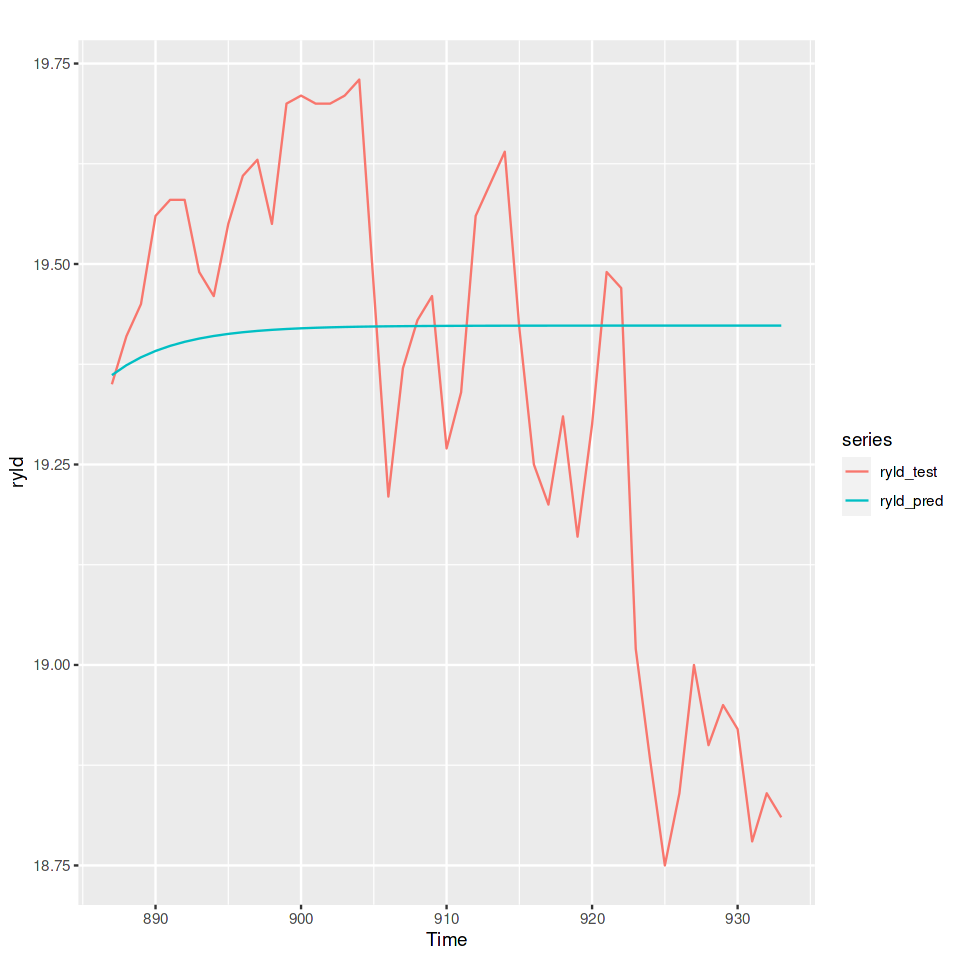

In [18]:
prediccion<-stats::predict(mod1$fitted.values, h=h)
ryld<-cbind(Pr_test$in1, prediccion$mean) 
colnames(ryld)<-c('ryld_test','ryld_pred')
options(repr.plot.width = 8, repr.plot.height =8)
autoplot(ryld)
#autoplot(predict(mod1$fitted.values, h=h))

**Metricas sobre test**

In [19]:
yardstick::rmse(Pr_test, truth = in1, estimate = prediccion$mean)
yardstick::mae(Pr_test, truth = in1, estimate = prediccion$mean)
yardstick::mape(Pr_test, truth = in1, estimate = prediccion$mean)


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.3059226


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
mae,standard,0.2400018


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
mape,standard,1.251865


****Bound test para validarv relaciones a largo plazo****

Case 1:
No intercept and no trend.

case inputs: 1 or "n" where "n" stands for none.

Case 2:
Restricted intercept and no trend.

case inputs: 2 or "rc" where "rc" stands for restricted constant.

Case 3:
Unrestricted intercept and no trend.

case inputs: 3 or "uc" where "uc" stands for unrestricted constant.

Case 4:
Unrestricted intercept and restricted trend.

case inputs: 4 or "ucrt" where "ucrt" stands for unrestricted constant and restricted trend.

Case 5:
Unrestricted intercept and unrestricted trend.

case inputs: 5 or "ucut" where "ucut" stands for unrestricted constant and unrestricted trend.

In [23]:
#Guardamos el mejor modelo obtenido en la sección anterior
modelo <- models$best_model
#Realizamos la prueba de hipotesis
bounds_f_test(modelo, case = 2) 


	Bounds F-test (Wald) for no cointegration

data:  d(in1) ~ L(in1, 1) + L(in2, 1) + L(in3, 1) + L(in4, 1) + d(L(in1,     1)) + d(L(in1, 2)) + d(in2) + d(in3) + d(in4) + d(L(in4,     1)) + d(L(in4, 2))
F = 2.5919, p-value = 0.2228
alternative hypothesis: Possible cointegration
null values:
   k    T 
   3 1000 


In [24]:
#Guardamos el mejor modelo obtenido en la sección anterior
modelo <- models$best_model
#Realizamos la prueba de hipotesis
bounds_f_test(modelo, case = 3) 


	Bounds F-test (Wald) for no cointegration

data:  d(in1) ~ L(in1, 1) + L(in2, 1) + L(in3, 1) + L(in4, 1) + d(L(in1,     1)) + d(L(in1, 2)) + d(in2) + d(in3) + d(in4) + d(L(in4,     1)) + d(L(in4, 2))
F = 2.9303, p-value = 0.2407
alternative hypothesis: Possible cointegration
null values:
   k    T 
   3 1000 


***Pronostico hacia adelante con toda la serie***

In [28]:
mod_all <- ardl(in1 ~ in2 +in3 + in4, data = prices_df, order = c(3,1,1,3))
summary(mod_all)
     


Time series regression with "ts" data:
Start = 4, End = 933

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.68079 -0.09527  0.01100  0.11051  0.75287 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1251244  0.0832777   1.502 0.133313    
L(in1, 1)    0.8691677  0.0302154  28.766  < 2e-16 ***
L(in1, 2)    0.3331719  0.0382673   8.706  < 2e-16 ***
L(in1, 3)   -0.2184549  0.0299465  -7.295 6.46e-13 ***
in2          0.0059425  0.0008642   6.876 1.14e-11 ***
L(in2, 1)   -0.0063057  0.0008642  -7.297 6.37e-13 ***
in3          0.0271981  0.0033956   8.010 3.47e-15 ***
L(in3, 1)   -0.0259828  0.0034262  -7.584 8.23e-14 ***
in4          0.0932308  0.0072608  12.840  < 2e-16 ***
L(in4, 1)   -0.0772961  0.0101365  -7.625 6.06e-14 ***
L(in4, 2)   -0.0335375  0.0100614  -3.333 0.000893 ***
L(in4, 3)    0.0204129  0.0073473   2.778 0.005576 ** 
---
Signif. codes

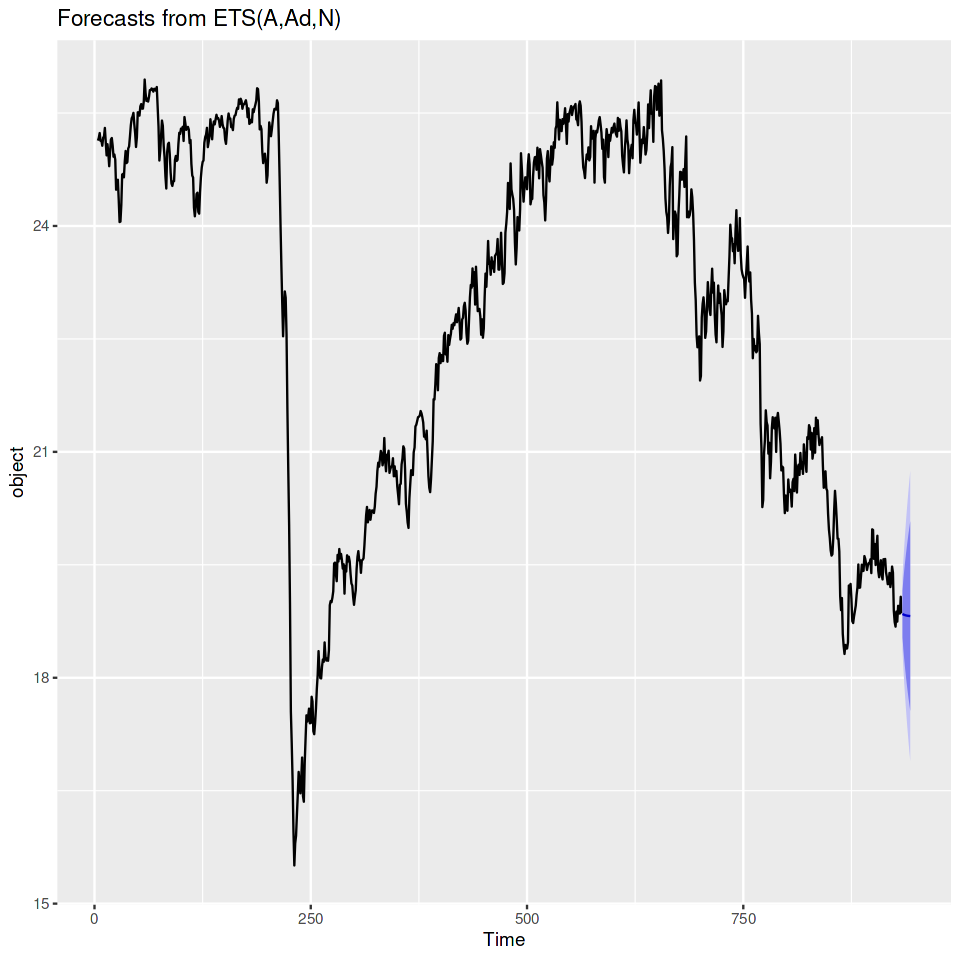

In [29]:
prediccion<-stats::predict(mod_all$fitted.values, h=10)
autoplot(predict(mod_all$fitted.values, h=10))

In [30]:
prediccion

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
934       18.84718 18.53604 19.15832 18.37133 19.32302
935       18.84072 18.37839 19.30306 18.13364 19.54781
936       18.83556 18.24547 19.42565 17.93310 19.73803
937       18.83143 18.12607 19.53679 17.75268 19.91019
938       18.82813 18.01614 19.64012 17.58630 20.06996
939       18.82549 17.91365 19.73733 17.43095 20.22003
940       18.82337 17.81735 19.82939 17.28480 20.36195
941       18.82168 17.72640 19.91696 17.14659 20.49677
942       18.82033 17.64014 20.00052 17.01538 20.62528
943       18.81925 17.55804 20.08046 16.89039 20.74810